2440050874 - Michael Julian - LD01

## import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/man-juu/datasetUASML/main/DNA.csv")
print(df.head())
print(df.shape)

   num_of_atoms  num_of_heavy_atoms
0            14                   6
1            11                   5
2            15                   6
3            21                   7
4            20                   7
(14610, 2)


In [ ]:
X = np.array(df)

## build model

In [ ]:
def euclidean(p, q):
    return np.sqrt(np.sum((p - q)**2))

In [ ]:
np.random.seed(40)
class KMeans:
  def __init__(self, k, max_iters):
    self.k = k
    self.max_iters = max_iters
    self.clusters = [[] for _ in range(self.k)]
    self.centroids = []
  
  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    random_sample_idxs = np.random.choice(self.n_samples, self.k, replace=False)
    self.centroids = [self.X[idx] for idx in random_sample_idxs]

    for _ in range(self.max_iters):
      #expectation (update cluster label sesuai point terdekat)
      self.clusters = self.update_clusters(self.centroids)

      #maximization (update centroid ke mean setiap cluster)
      prev_centroids = self.centroids
      self.centroids = self.update_centroids(self.clusters)

      #check convergence (posisi centroid tidak berubah)
      if self.is_converged(prev_centroids, self.centroids):
        break
    return self._get_cluster_labels(self.clusters)
  
  def _get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
    return labels
  
  def update_clusters(self, centroids):
    clusters = [[] for _ in range(self.k)]
    for idx, sample in enumerate(self.X):
      centroid_idx = np.argmin([euclidean(sample, point) for point in centroids])
      clusters[centroid_idx].append(idx)
    return clusters
  
  def update_centroids(self, clusters):
    centroids = np.zeros((self.k, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      centroids[cluster_idx] = np.mean(self.X[cluster], axis=0)
    return centroids

  def is_converged(self, prev_centroids, centroids):
    dist = [euclidean(prev_centroids[i], centroids[i]) for i in range(self.k)]
    return sum(dist) == 0
  
  def plot_cluster(self):
    fig, ax = plt.subplots(figsize=(12,8))
    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)
    for point in self.centroids:
      ax.scatter(*point, marker="+", color="black", linewidth=2)
    plt.show()

## plot after clustering

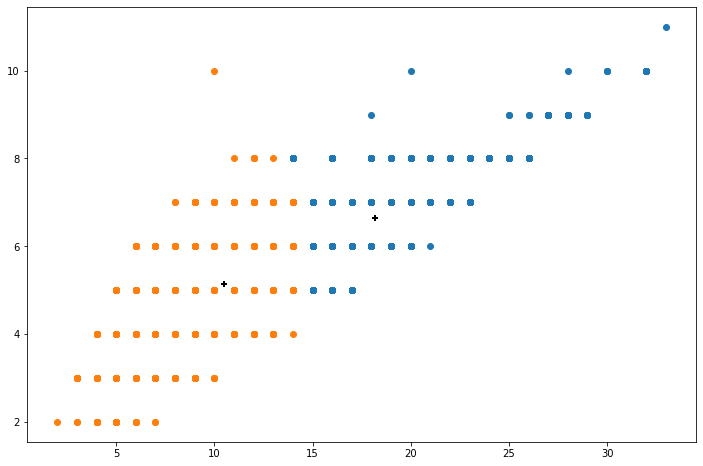

In [ ]:
clusters = 2 #initialize k (DNA sakit dan DNA  tidak sakit)
model = KMeans(k=clusters, max_iters=200)
y_pred = model.predict(X)
model.plot_cluster()